In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [4]:
# ============================================================
# 2. LOAD FINAL DATASET
# ============================================================

df = pd.read_csv("../data/processed/Fire/fnf.csv")

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (194665, 49)


C:\Users\lemon\AppData\Local\Temp\ipykernel_14200\266279862.py:5: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/processed/Fire/fnf.csv")


,latitude,longitude,fire,tile_lat,tile_lon,elevation,tmax_winter,tmax_spring,tmax_summer,tmax_fall,...,TCARBON_EQ,GYPSUM,ELEC_COND,geometry,ID,GRIDCODE,AREA,LCCCODE,AREA_M2,LCCCode_1
0,19.64323,3.26695,0,392.0,65.0,526,27.500000,38.333332,39.916668,35.0,...,8.0,4.0,1.0,POINT (3.2669500000017795 19.643229999999992),384287,202,3.042385e+08,6004,NaN,NaN
1,19.64323,3.31695,0,392.0,66.0,525,27.500000,38.333332,39.916668,35.0,...,8.0,4.0,1.0,POINT (3.3169500000017873 19.643229999999992),384287,202,3.042385e+08,6004,NaN,NaN
2,19.64323,3.36695,0,392.0,67.0,514,27.666666,38.333332,40.000000,35.0,...,6.3,0.3,1.0,POINT (3.366950000001795 19.643229999999992),384287,202,3.042385e+08,6004,NaN,NaN
3,19.64323,3.36695,0,392.0,67.0,514,27.666666,38.333332,40.000000,35.0,...,-3.0,-3.0,-3.0,POINT (3.366950000001795 19.643229999999992),384287,202,3.042385e+08,6004,NaN,NaN
4,19.64323,3.41695,0,392.0,68.0,519,27.666666,38.333332,40.000000,35.0,...,6.3,0.3,1.0,POINT (3.416950000001803 19.643229999999992),384287,202,3.042385e+08,6004,NaN,NaN


In [5]:
# count of each class
df["fire"].value_counts()

fire
0    194665
Name: count, dtype: int64

In [6]:
df.columns

Index(['latitude', 'longitude', 'fire', 'tile_lat', 'tile_lon', 'elevation',
       'tmax_winter', 'tmax_spring', 'tmax_summer', 'tmax_fall', 'tmin_winter',
       'tmin_spring', 'tmin_summer', 'tmin_fall', 'prec_winter', 'prec_spring',
       'prec_summer', 'prec_fall', 'SOIL_ID', 'HWSD2_SMU_ID', 'COARSE', 'SAND',
       'SILT', 'CLAY', 'TEXTURE_USDA', 'TEXTURE_SOTER', 'BULK', 'REF_BULK',
       'ORG_CARBON', 'PH_WATER', 'TOTAL_N', 'CN_RATIO', 'CEC_SOIL', 'CEC_CLAY',
       'CEC_EFF', 'TEB', 'BSAT', 'ALUM_SAT', 'ESP', 'TCARBON_EQ', 'GYPSUM',
       'ELEC_COND', 'geometry', 'ID', 'GRIDCODE', 'AREA', 'LCCCODE', 'AREA_M2',
       'LCCCode_1'],
      dtype='object')

In [34]:
# see what class are the missing values

df.isna().sum()



latitude            0
longitude           0
fire                0
elevation           0
tmax_winter         0
tmax_spring         0
tmax_summer         0
tmax_fall           0
tmin_winter         0
tmin_spring         0
tmin_summer         0
tmin_fall           0
prec_winter         0
prec_spring         0
prec_summer         0
prec_fall           0
SOIL_ID             0
HWSD2_SMU_ID        0
COARSE              0
SAND                0
SILT                0
CLAY                0
TEXTURE_USDA     3558
TEXTURE_SOTER       0
BULK                0
REF_BULK         3558
ORG_CARBON          0
PH_WATER            0
TOTAL_N             0
CN_RATIO            0
CEC_SOIL            0
CEC_CLAY            0
CEC_EFF             0
TEB                 0
BSAT                0
ALUM_SAT            0
ESP                 0
TCARBON_EQ          0
GYPSUM              0
ELEC_COND           0
dtype: int64

In [35]:
# drop where missing value and fire class = 0
df = df.dropna(subset=df.columns[df.columns != "fire"])  



In [36]:

df.isna().sum()

latitude         0
longitude        0
fire             0
elevation        0
tmax_winter      0
tmax_spring      0
tmax_summer      0
tmax_fall        0
tmin_winter      0
tmin_spring      0
tmin_summer      0
tmin_fall        0
prec_winter      0
prec_spring      0
prec_summer      0
prec_fall        0
SOIL_ID          0
HWSD2_SMU_ID     0
COARSE           0
SAND             0
SILT             0
CLAY             0
TEXTURE_USDA     0
TEXTURE_SOTER    0
BULK             0
REF_BULK         0
ORG_CARBON       0
PH_WATER         0
TOTAL_N          0
CN_RATIO         0
CEC_SOIL         0
CEC_CLAY         0
CEC_EFF          0
TEB              0
BSAT             0
ALUM_SAT         0
ESP              0
TCARBON_EQ       0
GYPSUM           0
ELEC_COND        0
dtype: int64

In [37]:

# remove columns : SOIL_ID, HWSD2_SMU_ID
df = df.drop(columns=["SOIL_ID", "HWSD2_SMU_ID","latitude","longitude"])

In [38]:
# lable encoding : TEXTURE_SOTER
from sklearn.preprocessing import LabelEncoder

# Create encoder
le = LabelEncoder()

# Encode the column
df["TEXTURE_SOTER"] = le.fit_transform(df["TEXTURE_SOTER"])

# Optional: see encoding mapping
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)


{'C': np.int64(0), 'F': np.int64(1), 'M': np.int64(2)}


<Axes: >

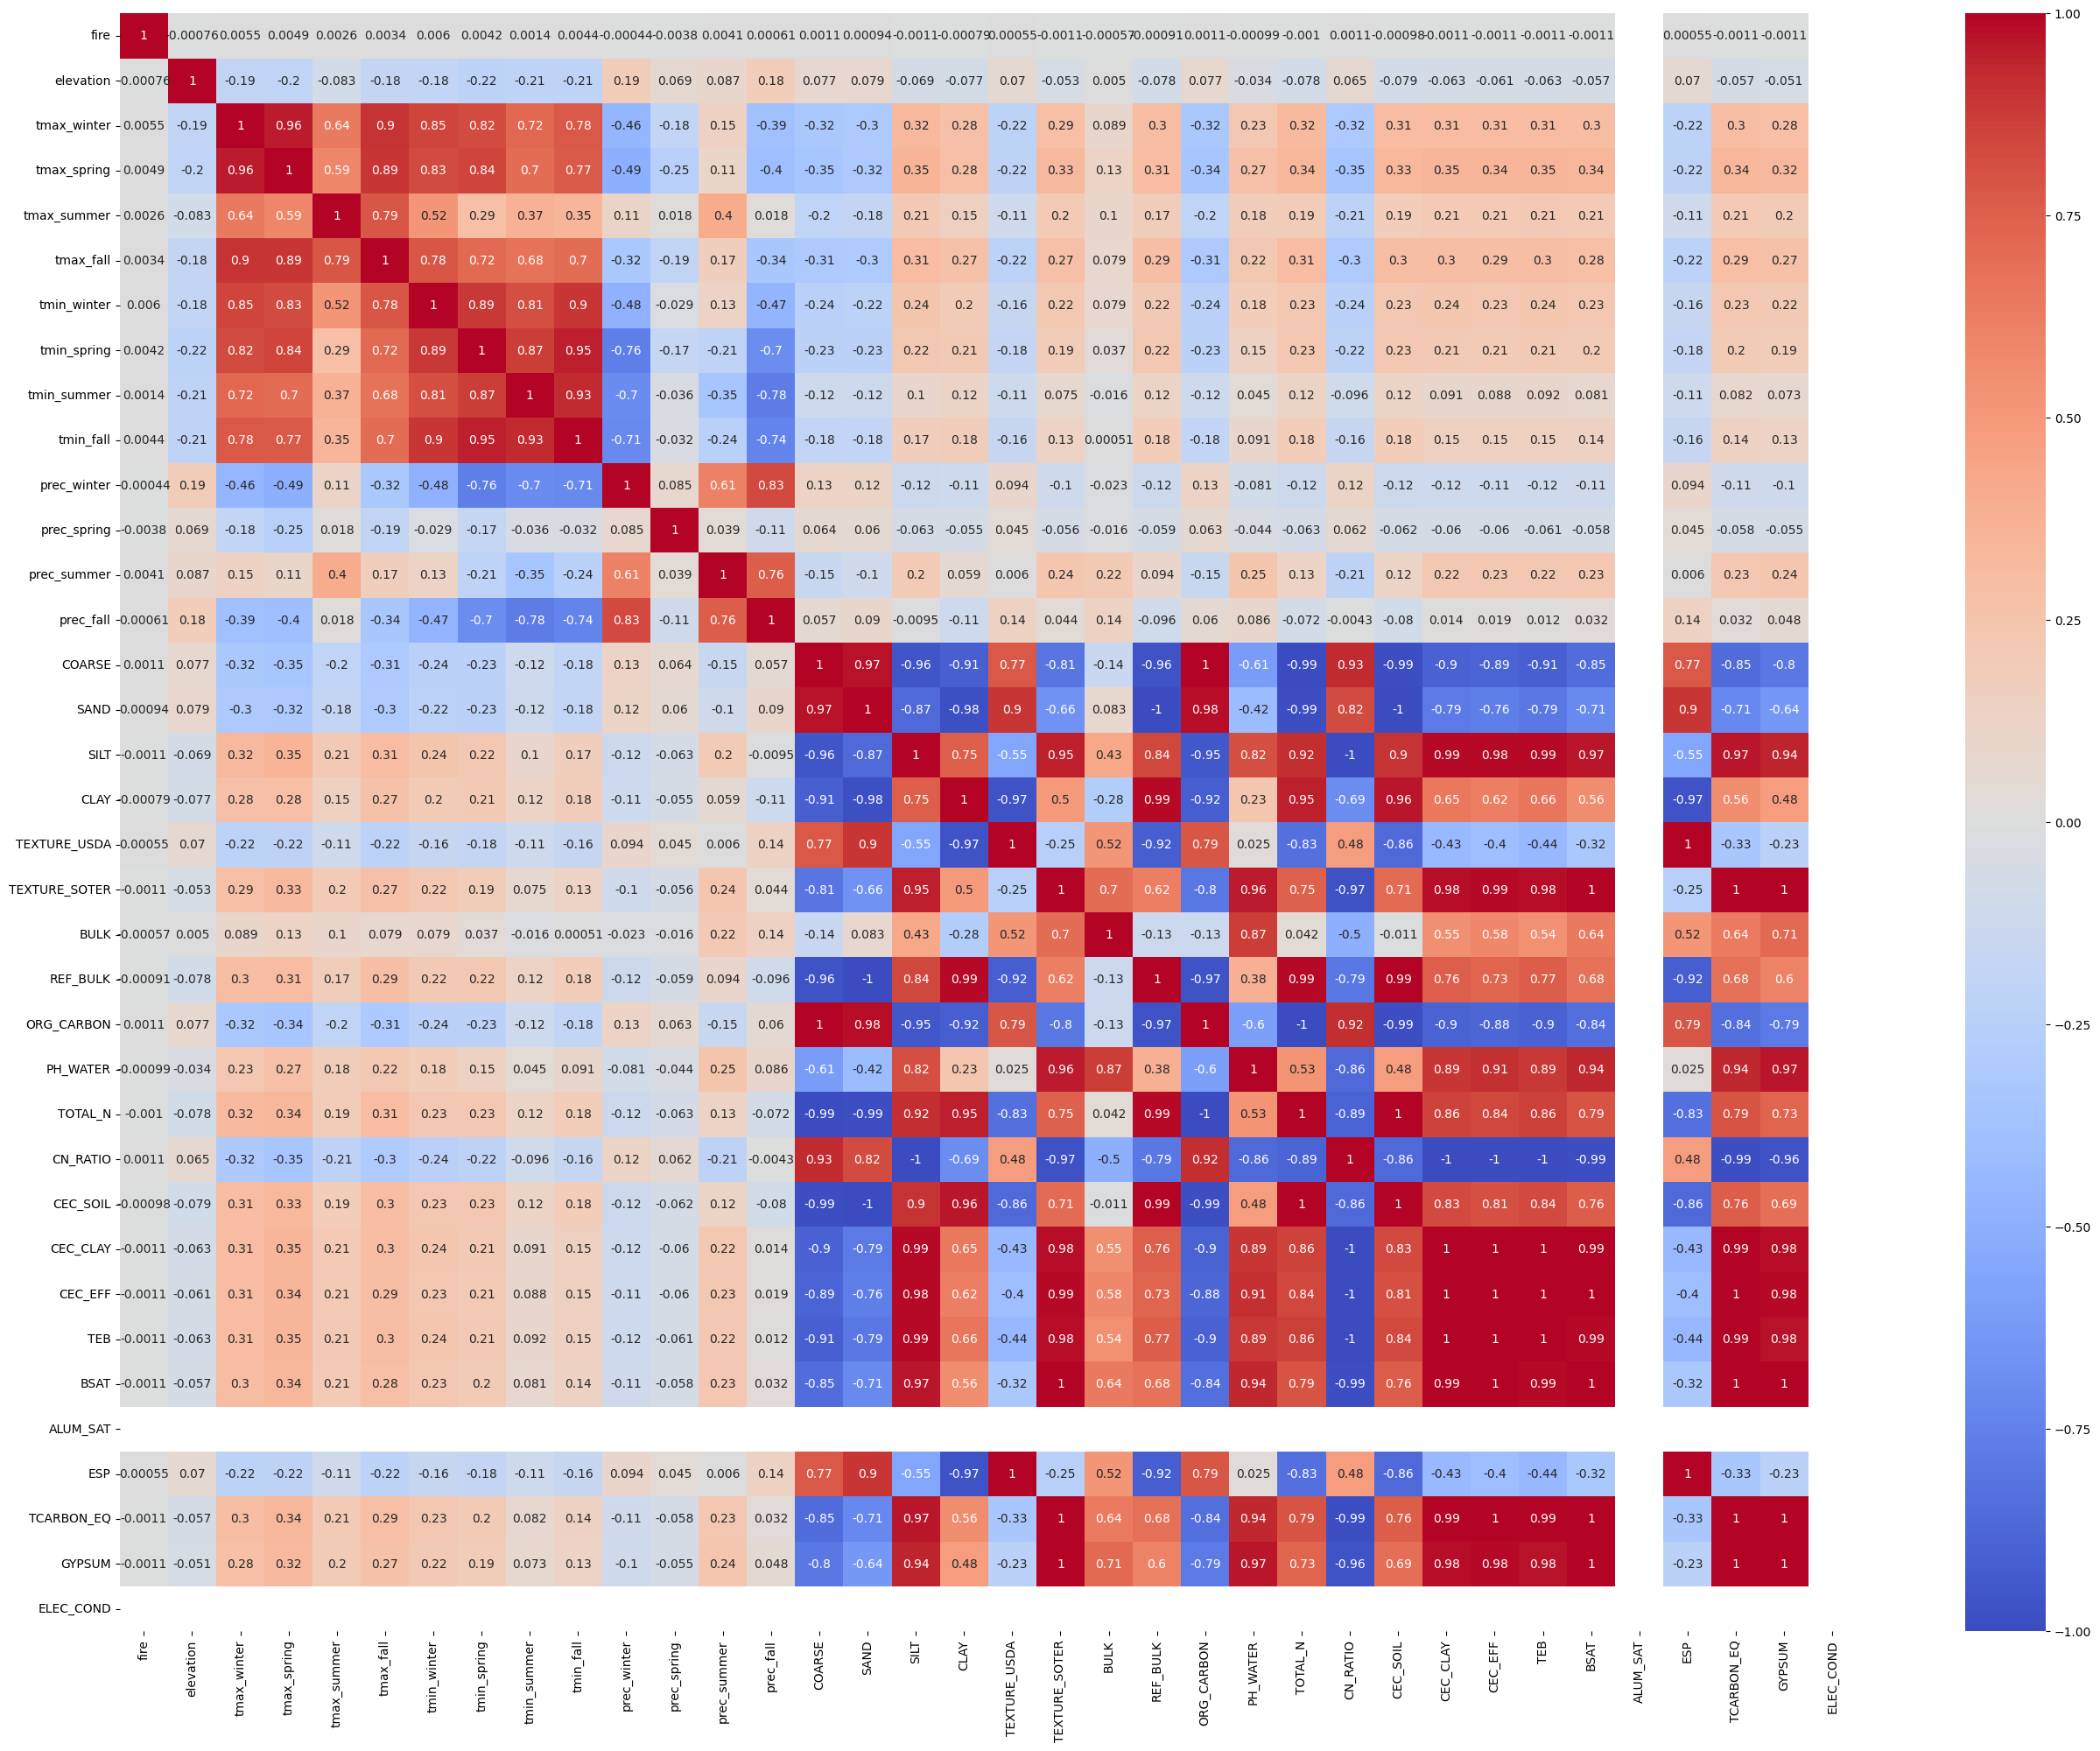

In [39]:
# coorelation matrix to see features that are less significant

corr = df.corr()

# plot the correlation matrix (keep only highly correlated features)

plt.figure(figsize=(32,24))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

Highly correlated columns removed: ['tmax_spring', 'tmax_fall', 'tmin_fall', 'SAND', 'SILT', 'CLAY', 'TEXTURE_USDA', 'TEXTURE_SOTER', 'REF_BULK', 'ORG_CARBON', 'PH_WATER', 'TOTAL_N', 'CN_RATIO', 'CEC_SOIL', 'CEC_CLAY', 'CEC_EFF', 'TEB', 'BSAT', 'ESP', 'TCARBON_EQ', 'GYPSUM']


<Axes: >

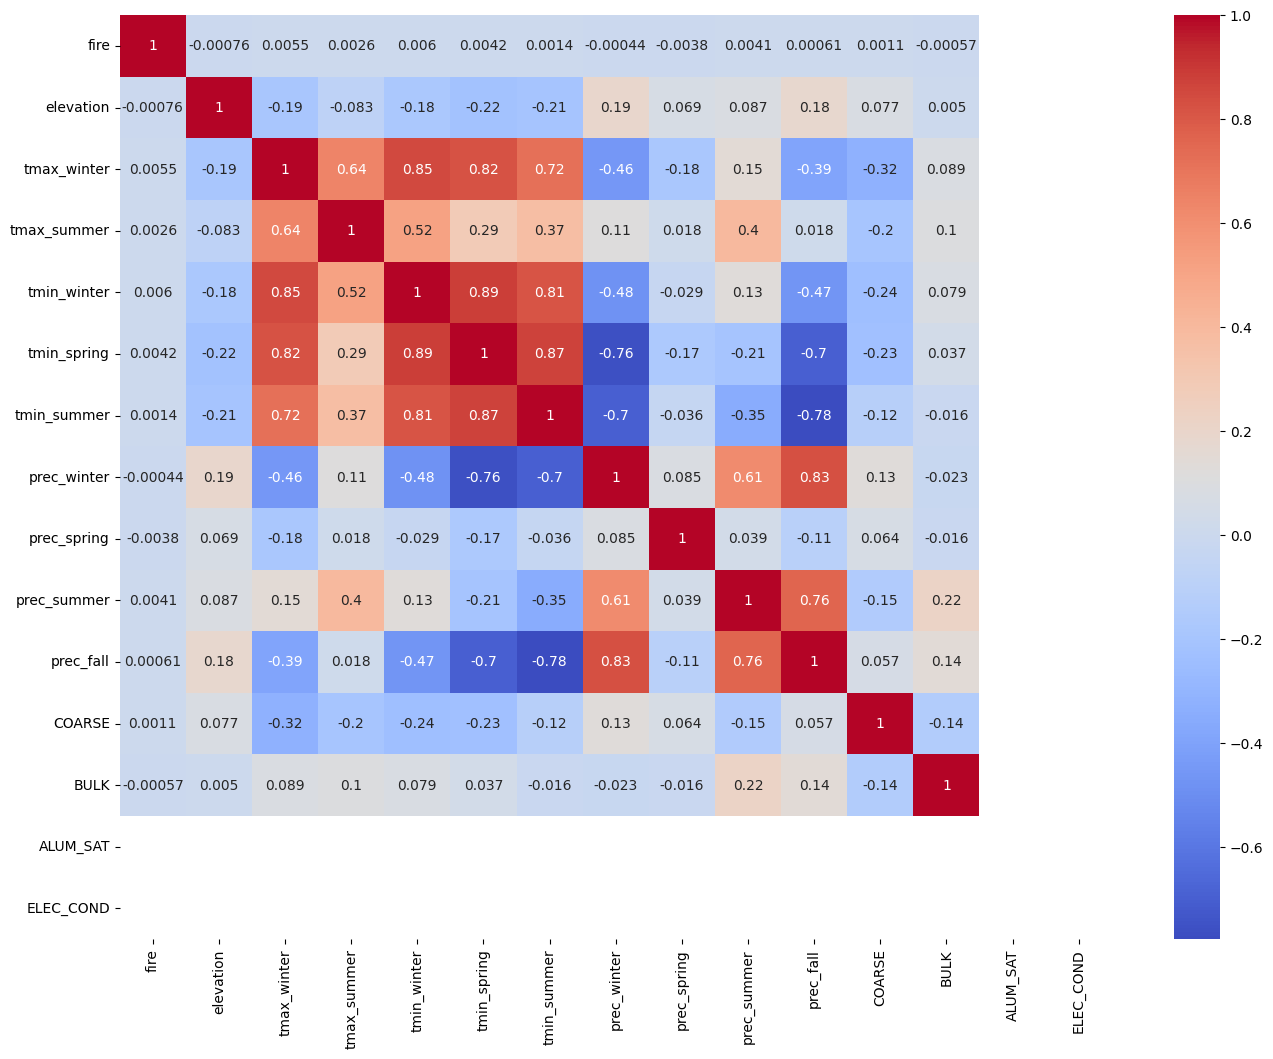

In [40]:
# remove features where corr < x

threshold = 0.90
corr_matrix = df.corr(numeric_only=True).abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > threshold)]

print("Highly correlated columns removed:", to_drop)

df = df.drop(columns=to_drop)

# plot
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")


In [41]:
# Summary
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 138338 entries, 0 to 141895
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fire         138338 non-null  int64  
 1   elevation    138338 non-null  int64  
 2   tmax_winter  138338 non-null  float64
 3   tmax_summer  138338 non-null  float64
 4   tmin_winter  138338 non-null  float64
 5   tmin_spring  138338 non-null  float64
 6   tmin_summer  138338 non-null  float64
 7   prec_winter  138338 non-null  float64
 8   prec_spring  138338 non-null  float64
 9   prec_summer  138338 non-null  float64
 10  prec_fall    138338 non-null  float64
 11  COARSE       138338 non-null  int64  
 12  BULK         138338 non-null  float64
 13  ALUM_SAT     138338 non-null  int64  
 14  ELEC_COND    138338 non-null  int64  
dtypes: float64(10), int64(5)
memory usage: 16.9 MB


In [42]:
# percentage of fire occurrence

fp = df["fire"].value_counts()

fp

fire
0    138335
1         3
Name: count, dtype: int64

In [43]:
# % missing per column
missing = df.isna().mean().sort_values(ascending=False)

missing_df = missing[missing > 0]
missing_df



Series([], dtype: float64)

In [44]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

print("Numeric:", len(numeric_cols))
print("Categorical:", len(cat_cols))


Numeric: 15
Categorical: 0


In [45]:
cat_cols

Index([], dtype='object')

In [46]:
num_imputer = SimpleImputer(strategy="mean")
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])


In [47]:
cat_imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


ValueError: at least one array or dtype is required

In [ ]:
# Method A — Z-Score Filtering
from scipy.stats import zscore

z_scores = np.abs(df[numeric_cols].apply(zscore))
outliers = (z_scores > 3).sum()

print("Number of outliers per feature:")
outliers


Number of outliers per feature:


latitude            0
longitude           0
fire                3
elevation          17
tmax_winter         0
tmax_spring         0
tmax_summer      1149
tmax_fall           0
tmin_winter         0
tmin_spring         0
tmin_summer         0
tmin_fall           0
prec_winter       449
prec_spring      1102
prec_summer         0
prec_fall           0
COARSE           5481
SAND             3558
SILT             3558
CLAY             5481
TEXTURE_USDA     1923
BULK             3558
REF_BULK         1923
ORG_CARBON       3558
PH_WATER         3558
TOTAL_N          3558
CN_RATIO         3558
CEC_SOIL         1923
CEC_CLAY        11444
CEC_EFF          3558
TEB              7886
BSAT             3558
ALUM_SAT         3558
ESP              3558
TCARBON_EQ       3558
GYPSUM           9521
ELEC_COND        3558
dtype: int64

In [ ]:
df_no_outliers = df[(z_scores < 3).all(axis=1)]
print("Before:", df.shape)
print("After :", df_no_outliers.shape)


Before: (141896, 38)
After : (128022, 38)


In [ ]:
# Method B — IQR Filter
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

mask = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | 
         (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

df_no_outliers = df[mask]

print("Before:", df.shape)
print("After :", df_no_outliers.shape)


Before: (141896, 38)
After : (91419, 38)
